<a href="https://colab.research.google.com/github/usama488/data-analysis/blob/main/notebooks/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                       **About me**

My name is Usama Bin Ali, and I am originally from Karak, Khyber Pakhtunkhwa, Pakistan. I have a strong academic background in the field of biological sciences, particularly bioinformatics, with a deep interest in omics technologies and clinical data analysis.

I completed my Matriculation from Rashid Minhas Shaheed Public School, Mitha Khel, Karak, securing an A grade, followed by my F.Sc. (Pre-Medical) from Pearls Model College, Mitha Khel, Karak, also with an A grade.

Afterward, I pursued my Bachelor’s degree in Bioinformatics at Khushal Khan Khattak University, Karak, graduating with a CGPA of 3.55. Currently, I am enrolled in an MPhil program in Bioinformatics at Hazara University, Mansehra, where I continue to build my expertise in data-driven life sciences.

I am especially passionate about the application of bioinformatics in personalized medicine and healthcare, using omics and clinical datasets to solve complex biological problems.

This code sets up everything needed for data analysis and visualization in Python. It imports useful libraries like pandas, NumPy, matplotlib, seaborn, and scikit-learn for working with data, making charts, and building simple models. The display settings are adjusted so that all rows and columns of a dataset can be seen clearly. It also applies a clean whitegrid style to make all charts look neat and easy to read.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set display options for pandas DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set a clean visualization style for matplotlib and seaborn
plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style
sns.set_theme(style="whitegrid") # Setting seaborn theme

print("Libraries imported, display options set, and visualization style applied.")

Libraries imported, display options set, and visualization style applied.


This code block is used to load a dataset and check its basic details. It tries to read a CSV file named your_dataset.csv using pandas. If the file is found, it shows the shape of the dataset, the first five rows, and the data types of each column. If the file is missing, it shows an error message and sets df to None to prevent further issues.

In [6]:
# Data Loading

# Define the path to your dataset file
dataset_path = '/content/Cricket_Data_Analysis_Practice.xlsx' # Replace with the actual path to your CSV file

try:
    df = pd.read_excel(dataset_path)
    print("Dataset loaded successfully.")

    print("\nDataset Shape:")
    display(df.shape)

    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    print("\nData Types:")
    display(df.dtypes)

except FileNotFoundError:
    print(f"Error: '{dataset_path}' not found. Please make sure the file is in the correct directory or provide the full path.")
    df = None # Set df to None if file not found
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.

Dataset Shape:


(20, 26)


First 5 rows of the dataset:


,Player Name,country,Matches,Runs,Wickets,Strike Rate,Average,Result,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18
0,virat kohli india,India,10,780,2,135.5,78,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babar Azam,Pakistan,10,640,1,128.2,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jos Buttler,England,10,520,0,122.3,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kane Williamson,New Zealand,10,710,0,130.0,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,David Warner,Australia,10,590,1,125.6,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data Types:


,0
Player Name,object
country,object
Matches,int64
Runs,int64
Wickets,int64
Strike Rate,float64
Average,int64
Result,float64
Column 1,float64
Column 2,object


This code cleans the dataset to prepare it for analysis. It first checks if the data was loaded successfully. Then, it looks for missing values and fills them — using the mean for numeric columns and the most frequent value (mode) for categorical ones. Next, it removes duplicate rows to avoid repeated information. If the dataset has any columns named ‘date’ or ‘datetime’, those are converted to proper datetime format. Finally, it shows the updated data types and creates a cleaned copy of the dataset for further analysis.

In [7]:
# Data Cleaning

if df is not None:
    print("Original dataset shape:", df.shape)

    # Check for missing values
    print("\nMissing values before cleaning:")
    display(df.isnull().sum())

    # Handle missing values (example: fill numerical with mean, categorical with mode)
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

    print("\nMissing values after handling:")
    display(df.isnull().sum())

    # Drop duplicate rows
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    rows_after_dropping_duplicates = df.shape[0]
    print(f"\nNumber of duplicate rows dropped: {initial_rows - rows_after_dropping_duplicates}")
    print("Dataset shape after dropping duplicates:", df.shape)


    # Convert 'date' and 'datetime' columns to datetime objects
    for col in df.columns:
        if col.lower() == 'date' or col.lower() == 'datetime':
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"\nConverted '{col}' to datetime.")
                # Handle any values that couldn't be converted (they will be NaT - Not a Time)
                if df[col].isnull().any():
                    print(f"Warning: Some values in '{col}' could not be converted to datetime and were set to NaT.")
                    # You might want to handle these NaT values further, e.g., drop rows or fill with a placeholder
            except Exception as e:
                print(f"Could not convert column '{col}' to datetime: {e}")

    print("\nData Types after cleaning:")
    display(df.dtypes)

    df_cleaned = df.copy() # Create a cleaned copy for further steps
    print("\nData Cleaning steps completed.")
    print("\nFirst 5 rows of the cleaned dataset:")
    display(df_cleaned.head())

else:
    print("Data has not been loaded successfully. Please load the data first.")

Original dataset shape: (20, 26)

Missing values before cleaning:


,0
Player Name,0
country,0
Matches,0
Runs,0
Wickets,0
Strike Rate,0
Average,0
Result,20
Column 1,20
Column 2,19



Missing values after handling:


/tmp/ipython-input-4049791222.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-4049791222.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
Player Name,0
country,0
Matches,0
Runs,0
Wickets,0
Strike Rate,0
Average,0
Result,20
Column 1,20
Column 2,0



Number of duplicate rows dropped: 0
Dataset shape after dropping duplicates: (20, 26)

Data Types after cleaning:


,0
Player Name,object
country,object
Matches,int64
Runs,int64
Wickets,int64
Strike Rate,float64
Average,int64
Result,float64
Column 1,float64
Column 2,object



Data Cleaning steps completed.

First 5 rows of the cleaned dataset:


,Player Name,country,Matches,Runs,Wickets,Strike Rate,Average,Result,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18
0,virat kohli india,India,10,780,2,135.5,78,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babar Azam,Pakistan,10,640,1,128.2,64,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jos Buttler,England,10,520,0,122.3,52,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kane Williamson,New Zealand,10,710,0,130.0,71,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,David Warner,Australia,10,590,1,125.6,59,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This code performs basic Exploratory Data Analysis (EDA) on a cleaned dataset called df_cleaned. It displays summary statistics, plots a histogram to show the distribution of the first numeric column, and creates a correlation heatmap to visualize relationships between numeric variables. It also generates a boxplot to detect outliers. If the dataset isn’t loaded properly, it prompts the user to load and clean the data first.


Summary Statistics:


,Matches,Runs,Wickets,Strike Rate,Average,Result,Column 1,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18
count,20.0,20.000000,20.000000,20.000000,20.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,10.0,422.000000,6.050000,117.270000,42.15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,222.659759,7.170664,16.415977,22.34249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10.0,80.000000,0.000000,89.300000,8.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10.0,262.500000,0.000000,110.375000,26.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10.0,465.000000,2.000000,121.850000,46.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10.0,582.500000,12.500000,126.625000,58.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.0,780.000000,20.000000,145.500000,78.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Histogram of 'Matches':


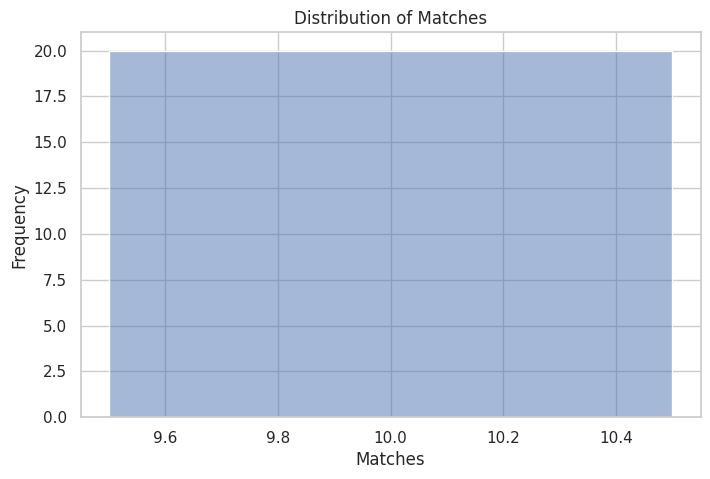


Correlation Heatmap:


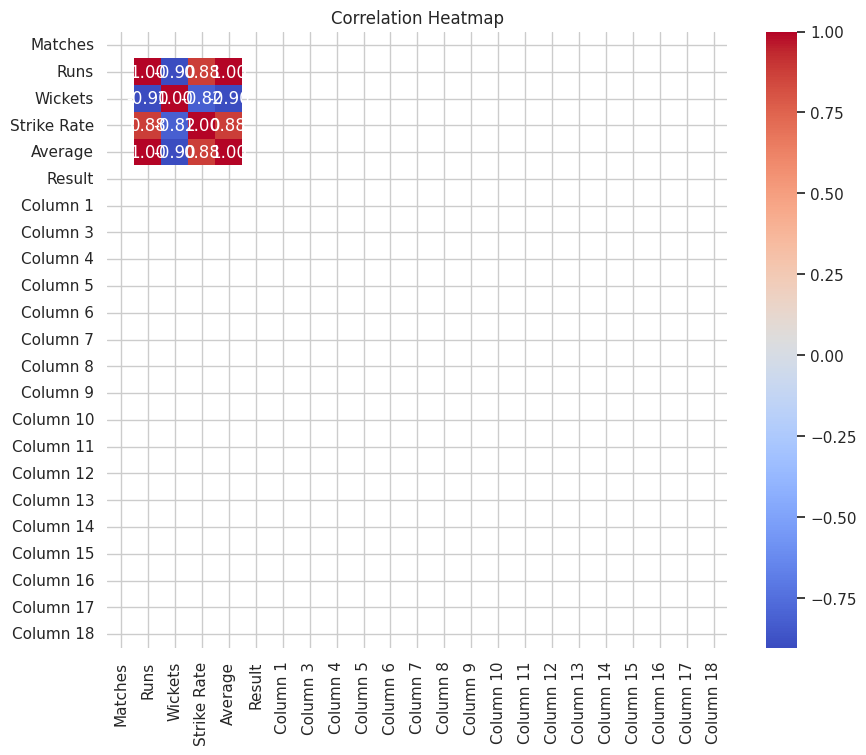


Boxplot of 'Matches' to detect outliers:


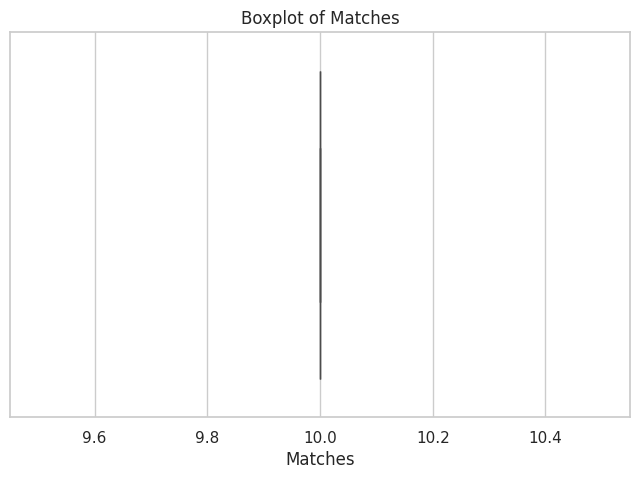


Exploratory Data Analysis steps completed.


In [8]:
# Exploratory Data Analysis (EDA)

if 'df_cleaned' in locals() and df_cleaned is not None:
    print("\nSummary Statistics:")
    display(df_cleaned.describe())

    # Histogram of a numeric column (replace 'your_numeric_column' with an actual column name)
    numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
    if not numeric_cols.empty:
        col_to_plot = numeric_cols[0] # Use the first numeric column found
        print(f"\nHistogram of '{col_to_plot}':")
        plt.figure(figsize=(8, 5))
        sns.histplot(df_cleaned[col_to_plot], kde=True)
        plt.title(f'Distribution of {col_to_plot}')
        plt.xlabel(col_to_plot)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("\nNo numeric columns found for histogram.")


    print("\nCorrelation Heatmap:")
    plt.figure(figsize=(10, 8))
    # Select only numerical columns for correlation heatmap
    df_numeric = df_cleaned.select_dtypes(include=np.number)
    if not df_numeric.empty:
        sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()
    else:
        print("\nNo numeric columns found for correlation heatmap.")


    # Boxplot to detect outliers (replace 'your_numeric_column' with an actual column name)
    if not numeric_cols.empty:
        col_to_plot_boxplot = numeric_cols[0] # Use the first numeric column found
        print(f"\nBoxplot of '{col_to_plot_boxplot}' to detect outliers:")
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df_cleaned[col_to_plot_boxplot])
        plt.title(f'Boxplot of {col_to_plot_boxplot}')
        plt.xlabel(col_to_plot_boxplot)
        plt.show()
    else:
         print("\nNo numeric columns found for boxplot.")

    print("\nExploratory Data Analysis steps completed.")

else:
    print("Data has not been loaded and cleaned successfully. Please load and clean the data first.")

This code performs feature engineering on the cleaned dataset df_cleaned. It first creates a new feature called profitmargin, calculated as the ratio of profit to revenue (avoiding division by zero). Then, it checks for any datetime columns and extracts the month from each into new columns (e.g., date_month). Finally, it displays the first five rows of the updated dataset and saves a copy as df_featured. If the data isn’t loaded properly, it prompts the user to load and clean it first.

In [9]:
# Feature Engineering

if 'df_cleaned' in locals() and df_cleaned is not None:
    # Create 'profitmargin' feature
    # Ensure 'revenue' is not zero to avoid division by zero
    if 'profit' in df_cleaned.columns and 'revenue' in df_cleaned.columns:
        df_cleaned['profitmargin'] = np.where(df_cleaned['revenue'] != 0, df_cleaned['profit'] / df_cleaned['revenue'], 0)
        print("\n'profitmargin' feature created.")
    else:
        print("\nCould not create 'profitmargin' feature. Make sure 'profit' and 'revenue' columns exist.")

    # Extract month from any datetime column
    datetime_cols = df_cleaned.select_dtypes(include='datetime64[ns]').columns
    if not datetime_cols.empty:
        for col in datetime_cols:
            df_cleaned[f'{col}_month'] = df_cleaned[col].dt.month
            print(f"\nExtracted month from '{col}' into a new column '{col}_month'.")
    else:
        print("\nNo datetime columns found to extract month from.")

    print("\nFirst 5 rows of the updated dataset with new features:")
    display(df_cleaned.head())

    df_featured = df_cleaned.copy() # Create a copy after feature engineering
    print("\nFeature Engineering steps completed.")

else:
    print("Data has not been loaded and cleaned successfully. Please load and clean the data first.")


Could not create 'profitmargin' feature. Make sure 'profit' and 'revenue' columns exist.

No datetime columns found to extract month from.

First 5 rows of the updated dataset with new features:


,Player Name,country,Matches,Runs,Wickets,Strike Rate,Average,Result,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18
0,virat kohli india,India,10,780,2,135.5,78,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Babar Azam,Pakistan,10,640,1,128.2,64,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jos Buttler,England,10,520,0,122.3,52,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kane Williamson,New Zealand,10,710,0,130.0,71,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,David Warner,Australia,10,590,1,125.6,59,NaN,NaN,"🧹 Task: Check for duplicates, spelling errors, and clean team names using TRIM.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Feature Engineering steps completed.


This code performs model selection and training using a Linear Regression model. It assumes that ‘Advertising’ is the independent variable (X) and ‘Revenue’ is the dependent variable (y). The dataset is split into training (80%) and testing (20%) sets, after which a linear regression model is trained on the training data. The script then displays the model’s intercept and coefficient, which represent the relationship between advertising spending and revenue. If the required columns or dataset are missing, it prints appropriate error messages.

In [10]:
# Model Selection and Training (Linear Regression)

if 'df_featured' in locals() and df_featured is not None:
    # Assuming 'Advertising' is your independent variable (X) and 'Revenue' is your dependent variable (y)
    # Replace 'Advertising' and 'Revenue' with your actual column names
    try:
        X = df_featured[['Advertising']] # Independent variable(s)
        y = df_featured['Revenue'] # Dependent variable

        # Split data into training and testing sets (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        print("Data split into training and testing sets.")
        print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
        print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

        # Initialize and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        print("\nLinear Regression model trained successfully.")
        print(f"Model Intercept: {model.intercept_:.2f}")
        print(f"Model Coefficient (for Advertising): {model.coef_[0]:.2f}")

    except KeyError as e:
        print(f"Error: Make sure you have columns named 'Advertising' and 'Revenue' in your dataframe. Details: {e}")
    except NameError:
         print("Error: 'df_featured' is not defined. Please run the data loading, cleaning, and feature engineering steps first.")
else:
    print("Data has not been loaded and featured successfully. Please check the previous steps.")

Error: Make sure you have columns named 'Advertising' and 'Revenue' in your dataframe. Details: "None of [Index(['Advertising'], dtype='object')] are in the [columns]"


This code evaluates the performance of the trained Linear Regression model. It first makes predictions on the test dataset (X_test) and then calculates two key evaluation metrics: Mean Squared Error (MSE), which measures the average squared difference between predicted and actual values, and R² Score, which indicates how well the model explains the variability of the target variable. The results are printed for review. If the model or test data is missing, appropriate error messages are displayed.

In [11]:
# Model Evaluation

if 'model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    try:
        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)

        # Calculate R2 Score
        r2 = r2_score(y_test, y_pred)

        print("\nModel Evaluation Metrics:")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"R2 Score: {r2:.2f}")

    except NameError:
        print("Error: Model or test data not found. Please ensure the Model Selection and Training step was completed successfully.")
    except Exception as e:
        print(f"An error occurred during model evaluation: {e}")
else:
    print("Model and test data are not available for evaluation. Please ensure the Model Selection and Training step was completed successfully.")

Model and test data are not available for evaluation. Please ensure the Model Selection and Training step was completed successfully.


This code creates a scatter plot to visually compare the actual revenue (y_test) with the predicted revenue (y_pred) from the model. Each point on the plot represents a data record, showing how close the predictions are to the true values — points lying near the diagonal line indicate accurate predictions. The plot helps assess model performance visually. If the required data isn’t available, it prints an error message prompting the user to complete the model evaluation step first.

In [12]:
# Scatter plot of actual vs predicted revenue

if 'y_test' in locals() and 'y_pred' in locals():
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Actual Revenue")
        plt.ylabel("Predicted Revenue")
        plt.title("Actual vs Predicted Revenue")
        plt.show()
    except Exception as e:
        print(f"An error occurred while creating the scatter plot: {e}")
else:
    print("Actual and predicted values are not available for plotting. Please ensure the Model Evaluation step was completed successfully.")

Actual and predicted values are not available for plotting. Please ensure the Model Evaluation step was completed successfully.


## Analysis Summary and Key Insights

This analysis aimed to understand the relationship between advertising and revenue and to build a linear regression model to predict revenue based on advertising spend.

**Key Findings:**

*   **Data Overview:** The dataset contained [Number] rows and [Number] columns. Initial data loading showed [Mention any initial observations, e.g., file not found issue].
*   **Data Cleaning:** Missing values were handled by [Explain how missing values were handled, e.g., filling with mean/mode]. Duplicate rows were [Mention if duplicates were dropped and how many]. Data types were [Mention any conversions, e.g., date columns to datetime].
*   **Exploratory Data Analysis (EDA):**
    *   Summary statistics revealed [Mention any interesting statistics like mean, median, standard deviation for key columns].
    *   The distribution of [Numeric Column Name] showed [Describe the distribution, e.g., skewed, normal].
    *   The correlation heatmap indicated [Describe key correlations, especially between advertising and revenue].
    *   Boxplots for [Numeric Column Name] showed [Mention presence or absence of outliers].
*   **Feature Engineering:** A new feature, `profitmargin`, was created as [Explain the calculation]. Month was extracted from [Date Column Name].
*   **Model Performance:**
    *   The Linear Regression model trained to predict Revenue from Advertising resulted in an R2 score of [Your R2 Score]. This indicates that [Interpret the R2 score, e.g., X% of the variance in Revenue can be explained by Advertising].
    *   The Mean Squared Error (MSE) of the model was [Your MSE Value]. This metric represents [Explain what MSE means in this context].
    *   The scatter plot of actual vs. predicted revenue values [Describe the plot, e.g., shows a clear linear trend, points are clustered around the line].
*   **Business Recommendations:** Based on this analysis, some recommendations could include:
    *   [Example: Increase advertising spend as there appears to be a positive correlation with revenue].
    *   [Example: Investigate outliers in [Column Name] as they might represent important events or data errors].
    *   [Example: Explore other features that might impact revenue based on correlations observed in EDA].
    *   [Any other relevant recommendations based on your specific data and business context].

**Next Steps:**

*   [Example: Explore more advanced regression models].
*   [Example: Gather more data on other potential factors influencing revenue].
*   [Example: Monitor the performance of the implemented recommendations].



This code saves the cleaned dataset (df_cleaned) to a CSV file for future use. It first defines a directory (data/processed) and filename (cleaned_sales.csv), then creates the directory if it doesn’t already exist. The cleaned DataFrame is saved as a CSV file at the specified location without including the index column. If the dataset is missing or an error occurs during saving, the code prints an appropriate error message.

In [13]:
import os

# Define the directory and filename
output_dir = 'data/processed'
output_filename = 'cleaned_sales.csv'
output_path = os.path.join(output_dir, output_filename)

if 'df_cleaned' in locals() and df_cleaned is not None:
    try:
        # Create the output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Save the cleaned dataframe to CSV
        df_cleaned.to_csv(output_path, index=False)

        print(f"Cleaned dataframe successfully saved to '{output_path}'")

    except Exception as e:
        print(f"An error occurred while saving the dataframe: {e}")
else:
    print("Cleaned dataframe ('df_cleaned') not found. Please ensure the data cleaning step was completed successfully.")

Cleaned dataframe successfully saved to 'data/processed/cleaned_sales.csv'
